# Pandas

Pandas provides data frames (similar to those in R) for python.

In [153]:
import pandas
import numpy as np
%matplotlib inline

## Series

In [155]:
series = pandas.Series(np.random.standard_normal(10))

In [156]:
series

0   -0.411755
1   -1.163063
2    0.349024
3    0.198570
4   -0.341714
5    0.063930
6    0.094260
7    0.979864
8    0.578736
9    0.464583
dtype: float64

In [162]:
series[5]

0.063929549337067376

In [164]:
series[5:7]

f    0.06393
g    0.09426
dtype: float64

In [160]:
series.index = (list('abcdefghij'))

In [161]:
series

a   -0.411755
b   -1.163063
c    0.349024
d    0.198570
e   -0.341714
f    0.063930
g    0.094260
h    0.979864
i    0.578736
j    0.464583
dtype: float64

In [165]:
series['a']

-0.41175470277854448

In [168]:
pandas.Series({'a': 12, 'b': -12})

a    12
b   -12
dtype: int64

In [166]:
series['a':'d']

a   -0.411755
b   -1.163063
c    0.349024
d    0.198570
dtype: float64

In [216]:
series + 2

a    1.588245
b    0.836937
c    2.349024
d    2.198570
e    1.658286
f    2.063930
g    2.094260
h    2.979864
i    2.578736
j    2.464583
dtype: float64

In [218]:
series * series

a    0.169542
b    1.352717
c    0.121817
d    0.039430
e    0.116768
f    0.004087
g    0.008885
h    0.960134
i    0.334936
j    0.215838
dtype: float64

In [167]:
series + pandas.Series([1,2], index=['a', 'z'])

a    0.588245
b         NaN
c         NaN
d         NaN
e         NaN
f         NaN
g         NaN
h         NaN
i         NaN
j         NaN
z         NaN
dtype: float64

## Data Frame

In [185]:
fish = pandas.DataFrame({'size': [100, 120, 70],
                         'weight': [20, 30, 25]},
                index = ['Brown Troupt', 'Atlantic Salmon', 'Chinook Salmon'])

In [186]:
fish

,size,weight
Brown Troupt,100,20
Atlantic Salmon,120,30
Chinook Salmon,70,25


In [187]:
fish[fish.weight > 20]

,size,weight
Atlantic Salmon,120,30
Chinook Salmon,70,25


In [188]:
fish[fish.weight < 30]['size']

Brown Troupt      100
Chinook Salmon     70
Name: size, dtype: int64

## Reading data

In [221]:
for i in dir(pandas):
    if i.startswith('read'):
        print i

read_clipboard
read_csv
read_excel
read_fwf
read_gbq
read_hdf
read_html
read_json
read_msgpack
read_pickle
read_sas
read_sql
read_sql_query
read_sql_table
read_stata
read_table


In [222]:
# Has also as_ methods

In [35]:
df = pandas.read_csv('data/201508_trip_data.csv.gz')

In [ ]:
df.info()

In [24]:
df.describe()

,Trip ID,Duration,End Terminal,Bike #
count,354152.000000,3.541520e+05,354152.000000,354152.000000
mean,676962.274416,1.046033e+03,58.421816,422.957911
std,138874.153513,3.001694e+04,16.876792,159.841550
min,432947.000000,6.000000e+01,2.000000,9.000000
25%,557009.750000,3.420000e+02,50.000000,327.000000
50%,679451.500000,5.110000e+02,63.000000,437.000000
75%,798026.250000,7.390000e+02,70.000000,546.000000
max,913460.000000,1.727040e+07,84.000000,878.000000


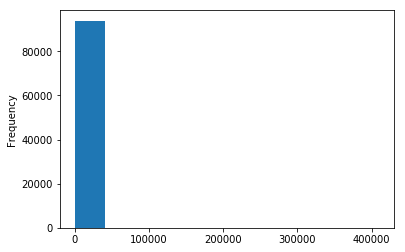

In [233]:
df.Duration.plot.hist()

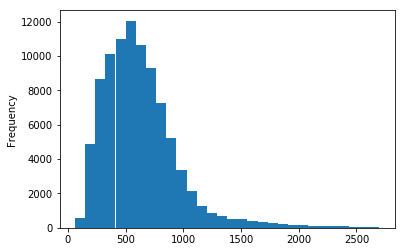

In [237]:
df[df.Duration < 60*45].Duration.plot.hist(bins = 30)

In [36]:
import datetime
def myd_hm(datetimestring):
    return datetime.datetime.strptime(datetimestring, '%m/%d/%Y %H:%M')
df['Start Date'] = df['Start Date'].apply(myd_hm)

In [70]:
stations = list(df.groupby('Start Station')['Duration'].count().sort_values().tail().index)

In [72]:
stations

['Embarcadero at Sansome',
 'Temporary Transbay Terminal (Howard at Beale)',
 'Harry Bridges Plaza (Ferry Building)',
 'San Francisco Caltrain 2 (330 Townsend)',
 'San Francisco Caltrain (Townsend at 4th)']

In [76]:
df = df[df['Start Station'].apply(lambda x: x in stations)]

In [77]:
departures = df[['Start Station', 'Duration', 'Start Date']]

In [78]:
departures.head()

,Start Station,Duration,Start Date
0,Harry Bridges Plaza (Ferry Building),765,2015-08-31 23:26:00
7,Embarcadero at Sansome,255,2015-08-31 22:16:00
10,Embarcadero at Sansome,691,2015-08-31 21:49:00
14,Temporary Transbay Terminal (Howard at Beale),424,2015-08-31 21:25:00
15,San Francisco Caltrain 2 (330 Townsend),283,2015-08-31 21:19:00


# Pivoting / Stacking

In [173]:
fish

,size,weight
Brown Troupt,100,20
Atlantic Salmon,120,30
Chinook Salmon,70,25


In [200]:
fish.stack()

Brown Troupt     size      100
                 weight     20
Atlantic Salmon  size      120
                 weight     30
Chinook Salmon   size       70
                 weight     25
dtype: int64

In [208]:
stacked = fish.stack().reset_index()

In [209]:
stacked

,level_0,level_1,0
0,Brown Troupt,size,100
1,Brown Troupt,weight,20
2,Atlantic Salmon,size,120
3,Atlantic Salmon,weight,30
4,Chinook Salmon,size,70
5,Chinook Salmon,weight,25


In [213]:
stacked.columns = ['name', 'info', 'value']

In [214]:
stacked

,name,info,value
0,Brown Troupt,size,100
1,Brown Troupt,weight,20
2,Atlantic Salmon,size,120
3,Atlantic Salmon,weight,30
4,Chinook Salmon,size,70
5,Chinook Salmon,weight,25


In [215]:
stacked.pivot(index='name', columns='info', values='value')

info,size,weight
name,,
Atlantic Salmon,120,30
Brown Troupt,100,20
Chinook Salmon,70,25


In [79]:
pivoted = departures.pivot_table(index='Start Date', columns='Start Station', values='Duration')

In [80]:
pivoted.head()

Start Station,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),Temporary Transbay Terminal (Howard at Beale)
Start Date,,,,,
2014-09-01 03:16:00,NaN,6712.0,NaN,NaN,NaN
2014-09-01 09:41:00,NaN,NaN,715.0,NaN,NaN
2014-09-01 09:42:00,NaN,NaN,NaN,601.0,NaN
2014-09-01 10:34:00,414.0,NaN,NaN,NaN,NaN
2014-09-01 10:37:00,949.0,NaN,NaN,NaN,NaN


## Time Series

In [81]:
daily_averages = pivoted.resample('1d').mean()

In [82]:
daily_averages.head()

Start Station,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),Temporary Transbay Terminal (Howard at Beale)
Start Date,,,,,
2014-09-01,4214.900000,2034.325000,3898.300000,5697.166667,527.333333
2014-09-02,776.712644,584.875000,602.343750,523.166667,515.843137
2014-09-03,848.012195,738.458333,611.924330,558.970270,523.452830
2014-09-04,737.666667,826.290000,1008.146474,628.082051,598.083333
2014-09-05,1005.341463,1040.880435,760.353554,602.419497,580.854167


In [224]:
daily_averages['2014'].head()

Start Station,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),Temporary Transbay Terminal (Howard at Beale),Weekday,Month
Start Date,,,,,,,
2014-09-01,4214.900000,2034.325000,3898.300000,5697.166667,527.333333,Mon,9
2014-09-02,776.712644,584.875000,602.343750,523.166667,515.843137,Tue,9
2014-09-03,848.012195,738.458333,611.924330,558.970270,523.452830,Wed,9
2014-09-04,737.666667,826.290000,1008.146474,628.082051,598.083333,Thu,9
2014-09-05,1005.341463,1040.880435,760.353554,602.419497,580.854167,Fri,9


In [226]:
daily_averages['2014-10'].head()

Start Station,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),Temporary Transbay Terminal (Howard at Beale),Weekday,Month
Start Date,,,,,,,
2014-10-01,2017.562500,1729.528846,747.191213,566.573837,501.398693,Wed,10
2014-10-02,1492.860000,1199.160000,653.659722,555.023663,716.618644,Thu,10
2014-10-03,816.750000,679.900000,696.092342,559.867150,493.988095,Fri,10
2014-10-04,2209.200000,2226.096774,940.470588,610.000000,637.250000,Sat,10
2014-10-05,2741.527778,5852.772727,623.083333,1455.153846,3377.000000,Sun,10


In [227]:
daily_averages['2014-10-15':'2014-10-20']

Start Station,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),Temporary Transbay Terminal (Howard at Beale),Weekday,Month
Start Date,,,,,,,
2014-10-15,609.283333,1299.451923,1433.136275,548.640845,519.727564,Wed,10
2014-10-16,858.304878,1237.673333,654.744309,565.372549,585.225000,Thu,10
2014-10-17,1074.593496,1016.199275,661.732906,603.558333,520.447917,Fri,10
2014-10-18,2888.658537,3395.312500,10690.700000,1519.500000,536.250000,Sat,10
2014-10-19,1358.304348,2596.423077,1256.631579,1348.705882,800.600000,Sun,10
2014-10-20,697.872807,1357.539007,654.409420,525.996324,599.636364,Mon,10


## Groupby

In [228]:
groupby_example = pandas.DataFrame({'key': ['a', 'b', 'a', 'b'], 'value': [1,2,1,2]})

In [229]:
groupby_example

,key,value
0,a,1
1,b,2
2,a,1
3,b,2


In [230]:
groupby_example.groupby('key').mean()

,value
key,
a,1
b,2


In [231]:
groupby_example.groupby('key').sum()

,value
key,
a,2
b,4


In [83]:
daily_averages.index

DatetimeIndex(['2014-09-01', '2014-09-02', '2014-09-03', '2014-09-04',
               '2014-09-05', '2014-09-06', '2014-09-07', '2014-09-08',
               '2014-09-09', '2014-09-10',
               ...
               '2015-08-22', '2015-08-23', '2015-08-24', '2015-08-25',
               '2015-08-26', '2015-08-27', '2015-08-28', '2015-08-29',
               '2015-08-30', '2015-08-31'],
              dtype='datetime64[ns]', name=u'Start Date', length=365, freq='D')

In [84]:
daily_averages['Weekday'] = daily_averages.index.weekday

In [124]:
mean_weekday = daily_averages.groupby('Weekday').mean()

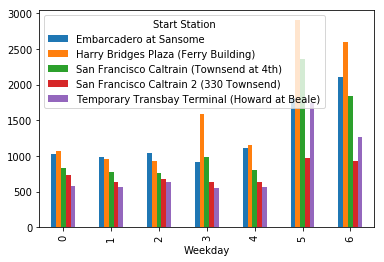

In [125]:
mean_weekday.plot(kind='bar')

In [89]:
import calendar

In [126]:
daily_averages['Weekday'] = daily_averages['Weekday'].apply(lambda x: calendar.day_abbr[x])

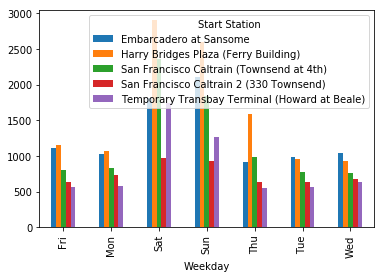

In [127]:
daily_averages.groupby('Weekday').mean().plot.bar()

In [130]:
means = daily_averages.groupby('Weekday').mean()

In [131]:
means.index

Index([u'Fri', u'Mon', u'Sat', u'Sun', u'Thu', u'Tue', u'Wed'], dtype='object', name=u'Weekday')

In [133]:
reverse_days = {calendar.day_abbr[i]: i for i in range(7)}

In [134]:
daynums = [reverse_days[i] for i in means.index]

In [135]:
import numpy as np

In [138]:
np.argsort(daynums)

array([1, 5, 6, 4, 0, 2, 3])

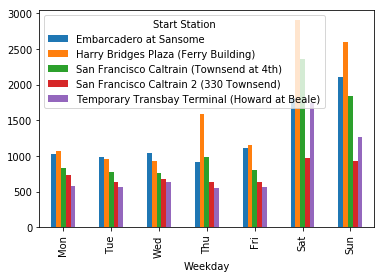

In [137]:
means.iloc[np.argsort(daynums)].plot.bar()

In [139]:
daily_averages['Month'] = daily_averages.index.month

In [143]:
import matplotlib.pyplot as plt

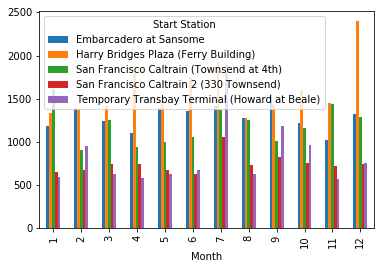

In [148]:
daily_averages.groupby('Month').mean().plot.bar()

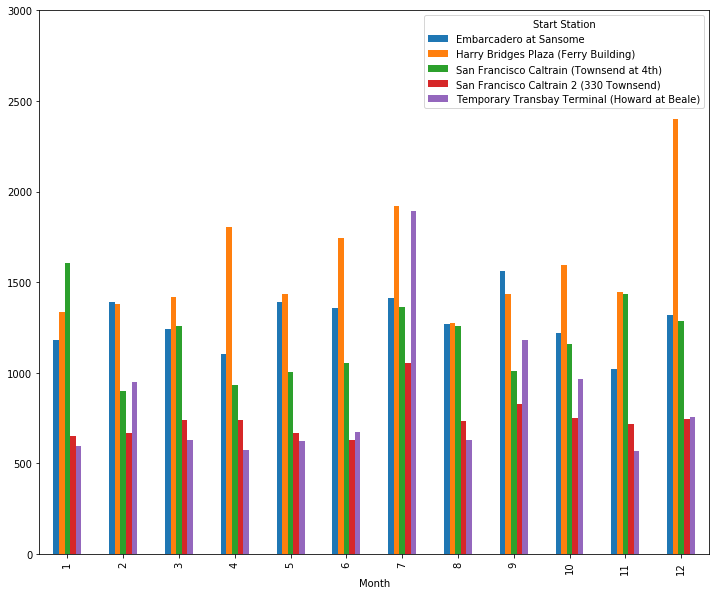

In [152]:
daily_averages.groupby('Month').mean().plot.bar(ylim=(0, 3000), figsize=(12,10))

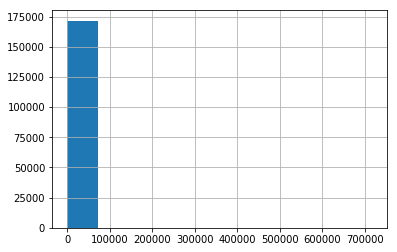

In [10]:
df.Duration.hist()

In [19]:
df[df.Duration > 1e6]

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
55259,841176,1133540,7/10/2015 10:35,University and Emerson,35,7/23/2015 13:27,University and Emerson,35,262,Customer,94306
66911,825850,2137000,6/28/2015 21:50,Market at Sansome,77,7/23/2015 15:27,Yerba Buena Center of the Arts (3rd @ Howard),68,466,Customer,97213
124532,750192,1852590,5/2/2015 6:17,San Antonio Shopping Center,31,5/23/2015 16:53,Castro Street and El Camino Real,32,680,Subscriber,94024
257759,568474,17270400,12/6/2014 21:59,South Van Ness at Market,66,6/24/2015 20:18,2nd at Folsom,62,535,Customer,95531


In [20]:
df.Duration.idxmax()

257759

In [21]:
df.loc[df.Duration.idxmax()]

Trip ID                              568474
Duration                           17270400
Start Date                  12/6/2014 21:59
Start Station      South Van Ness at Market
Start Terminal                           66
End Date                    6/24/2015 20:18
End Station                   2nd at Folsom
End Terminal                             62
Bike #                                  535
Subscriber Type                    Customer
Zip Code                              95531
Name: 257759, dtype: object

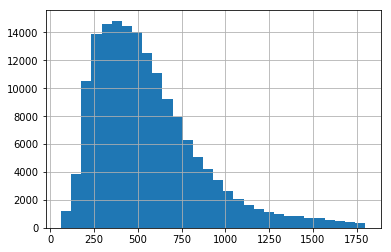

In [11]:
df.Duration[df.Duration < 60*30].hist(bins = 30)

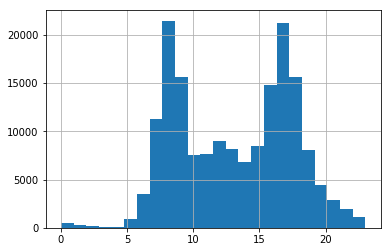

In [15]:
df['Start Date'].apply(lambda x: x.hour).hist(bins=24)

In [23]:
import numpy as np

In [37]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 14, 10

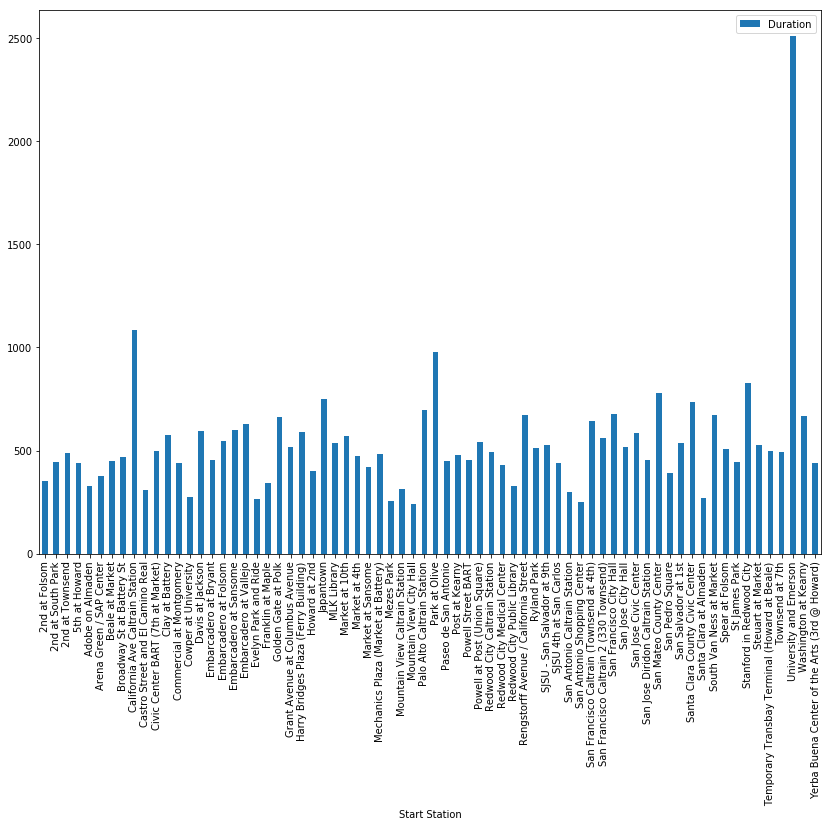

In [41]:
(df
 .groupby('Start Station', as_index=False)['Duration']
 .median()
 .plot
 .bar(x = 'Start Station', y = 'Duration'))

In [18]:
subs_fraction = df\
    .groupby("Start Station")\
    .apply(lambda x: sum(x["Subscriber Type"] == "Subscriber") / float(len(x)))

In [19]:
subs_fraction.head()

Start Station
2nd at Folsom        0.928691
2nd at South Park    0.901510
2nd at Townsend      0.862984
5th at Howard        0.845743
Adobe on Almaden     0.791667
dtype: float64

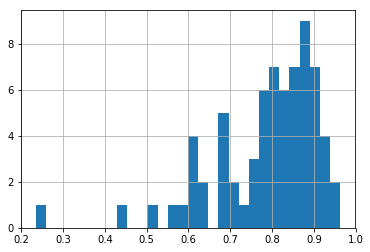

In [17]:
subs_fraction.hist(bins=30)

In [20]:
subs_fraction.idxmin()

'University and Emerson'

In [21]:
subs_fraction.idxmax()

'Temporary Transbay Terminal (Howard at Beale)'